## Importar librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

## Bases de datos

In [2]:
df = pd.read_csv('train.csv')
df

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,697,705,Asus,Chromebook Flip,2 in 1 Convertible,12.5,Full HD / Touchscreen 1920x1080,Intel Core M M3-6Y30 0.9GHz,4GB,64GB Flash Storage,Intel HD Graphics 515,Chrome OS,1.2kg,669.00
1,435,442,Asus,Rog Strix,Gaming,17.3,Full HD 1920x1080,AMD Ryzen 1600 3.2GHz,8GB,256GB SSD + 1TB HDD,AMD Radeon RX 580,Windows 10,3.2kg,1695.00
2,735,743,Lenovo,V310-15IKB (i7-7500U/4GB/1TB/FHD/W10),Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,4GB,1TB HDD,Intel HD Graphics 620,Windows 10,1.85kg,779.00
3,864,875,Dell,XPS 13,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7660U 2.5GHz,16GB,512GB SSD,Intel Iris Plus Graphics 640,Windows 10,1.29kg,2240.00
4,1176,1194,Lenovo,B51-80 (i7-6500U/4GB/1008GB/FHD/W7),Notebook,15.6,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,1.0TB Hybrid,Intel HD Graphics 520,Windows 7,2.32kg,825.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,920,934,Dell,Vostro 3568,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4GB,1TB HDD,AMD Radeon R5 M420,Windows 10,2.18kg,684.99
908,298,303,Lenovo,IdeaPad 310-15ABR,Notebook,15.6,Full HD 1920x1080,AMD A10-Series 9600P 2.4GHz,6GB,1TB HDD,AMD Radeon R5 430,Windows 10,2.4kg,499.00
909,919,933,MSI,GL62M 7RD,Gaming,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.2kg,1119.91
910,717,725,Lenovo,110-15ACL (A6-7310/4GB/500GB/W10),Notebook,15.6,1366x768,AMD A6-Series 7310 2GHz,4GB,500GB HDD,AMD Radeon R4,Windows 10,2.19kg,298.00


In [3]:
df_test = pd.read_csv('test.csv')

In [4]:
df_sub = pd.read_csv("sample_submission.csv")

In [59]:
df_sub

,id,Price_euros
0,824,496.0
1,101,1948.5
2,1157,947.5
3,940,621.0
4,853,1032.5
...,...,...
386,292,1273.5
387,688,850.0
388,910,1135.0
389,54,1452.0


## EDA

In [5]:
df.describe()

,id,laptop_ID,Inches,Price_euros
count,912.000000,912.000000,912.000000,912.00000
mean,652.099781,661.273026,15.060746,1126.92034
std,375.428905,380.297415,1.412363,696.08887
min,0.000000,1.000000,10.100000,174.00000
25%,332.500000,338.500000,14.000000,589.00000
50%,655.500000,663.500000,15.600000,952.00000
75%,980.500000,994.500000,15.600000,1499.00000
max,1301.000000,1319.000000,18.400000,4899.00000


In [62]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Inches            391 non-null    float64
 1   Ram(GB)           391 non-null    int64  
 2   Weight(kg)        391 non-null    float64
 3   SSD_GB            391 non-null    float64
 4   HDD_GB            391 non-null    float64
 5   Hybrid_GB         391 non-null    float64
 6   Flash_GB          391 non-null    float64
 7   CPU_Brand         391 non-null    int64  
 8   CPU_Speed_GHz     391 non-null    float64
 9   Cpu_model_number  391 non-null    int64  
 10  CPU_Type_Other    391 non-null    bool   
 11  CPU_Type_i3       391 non-null    bool   
 12  CPU_Type_i5       391 non-null    bool   
 13  CPU_Type_i7       391 non-null    bool   
 14  Is_Dedicated_GPU  391 non-null    int64  
 15  GPU_Model_Num     391 non-null    int64  
 16  Has_Nvidia_GPU    391 non-null    int64  
 1

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Inches            912 non-null    float64
 1   Ram(GB)           912 non-null    int64  
 2   Weight(kg)        912 non-null    float64
 3   Price_euros       912 non-null    float64
 4   SSD_GB            912 non-null    float64
 5   HDD_GB            912 non-null    float64
 6   Hybrid_GB         912 non-null    float64
 7   Flash_GB          912 non-null    float64
 8   CPU_Brand         912 non-null    int64  
 9   CPU_Speed_GHz     912 non-null    float64
 10  Cpu_model_number  912 non-null    int64  
 11  CPU_Type_Other    912 non-null    bool   
 12  CPU_Type_i3       912 non-null    bool   
 13  CPU_Type_i5       912 non-null    bool   
 14  CPU_Type_i7       912 non-null    bool   
 15  Is_Dedicated_GPU  912 non-null    int64  
 16  GPU_Model_Num     912 non-null    int64  
 1

In [8]:
df_test

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,824,833,Lenovo,ThinkPad X1,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB Flash Storage,Intel HD Graphics 620,Windows 10,1.13kg
1,101,104,HP,15-bw000nv (E2-9000e/4GB/500GB/Radeon,Notebook,15.6,Full HD 1920x1080,AMD E-Series E2-9000e 1.5GHz,4GB,500GB HDD,AMD Radeon R2,Windows 10,2.1kg
2,1157,1175,Lenovo,ThinkPad T460s,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 6600U 2.6GHz,12GB,512GB SSD,Intel HD Graphics 520,Windows 7,1.4kg
3,940,954,HP,Omen 17-W006na,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i5 6300HQ 2.3GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 965M,Windows 10,2.75kg
4,853,864,Lenovo,ThinkPad T470p,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia GeForce GT 940MX,Windows 10,1.96kg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,292,297,HP,17-BS037cl (i3-6006U/8GB/1TB/W10),Notebook,17.3,1600x900,Intel Core i3 6006U 2GHz,8GB,1TB HDD,Intel HD Graphics 520,Windows 10,2.54kg
387,688,696,HP,17-Y002nv (A10-9600P/6GB/2TB/Radeon,Notebook,17.3,IPS Panel Full HD 1920x1080,AMD A10-Series 9600P 2.4GHz,6GB,2TB HDD,AMD Radeon R7 M440,Windows 10,2.65kg
388,910,923,Dell,Latitude 5480,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7440HQ 2.8GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.6kg
389,54,55,Acer,Aspire 3,Notebook,15.6,1366x768,Intel Core i3 7100U 2.4GHz,4GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.4kg


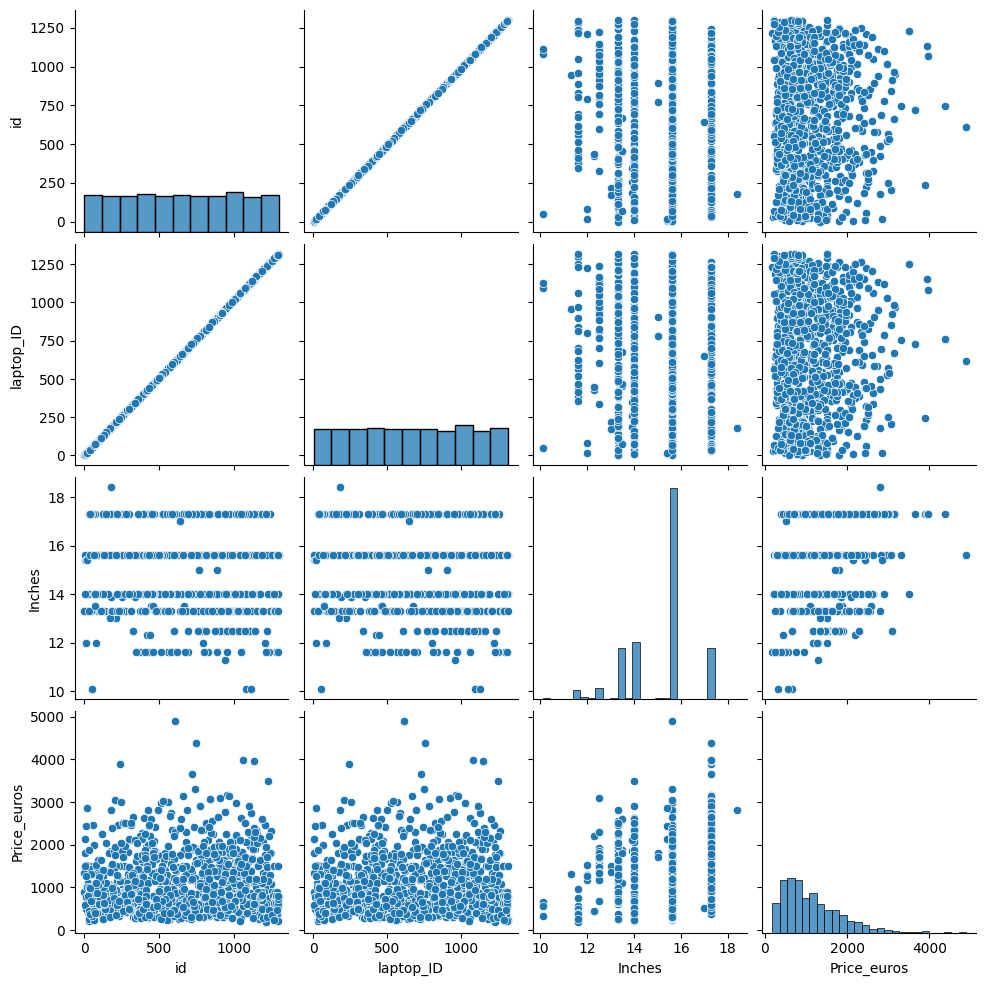

In [9]:
sns.pairplot(df)

## Data Engineering

### Limpiar RAM

In [10]:
df["Ram"]
df.rename(columns={"Ram": "Ram(GB)"}, inplace=True)

In [11]:
df["Ram(GB)"]=df["Ram(GB)"].str.replace("GB", "", regex=False).astype(int)

In [12]:
df_test["Ram"]
df_test.rename(columns={"Ram": "Ram(GB)"}, inplace=True)

In [13]:
df_test["Ram(GB)"]=df_test["Ram(GB)"].str.replace("GB", "", regex=False).astype(int)

### Limpiar Weight

In [14]:
df["Weight"]
df.rename(columns={"Weight": "Weight(kg)"}, inplace=True)

In [15]:
df["Weight(kg)"]=df["Weight(kg)"].str.replace("kg", "", regex=False).astype(float)

In [16]:
df_test["Weight"]
df_test.rename(columns={"Weight": "Weight(kg)"}, inplace=True)

In [17]:
df_test["Weight(kg)"]=df_test["Weight(kg)"].str.replace("kg", "", regex=False).astype(float)

### Limpiar Memory

In [18]:
# Convertir todo a GB y Agruparlo por tipo de disco duro

def extract_memory_components(mem_str):
    ssd = hdd = hybrid = flash = 0
    if pd.isnull(mem_str):
        return pd.Series([ssd, hdd, hybrid, flash])

    mem_str = mem_str.replace(' ', '').replace('+', ' ')
    for part in mem_str.split():
        size = 0
        match = re.match(r'(\d+(?:\.\d+)?)(GB|TB)', part)
        if match:
            size, unit = match.groups()
            size = float(size)
            if unit == 'TB':
                size *= 1024
        else:
            continue

        if 'SSD' in part:
            ssd += size
        elif 'HDD' in part:
            hdd += size
        elif 'Hybrid' in part:
            hybrid += size
        elif 'FlashStorage' in part:
            flash += size

    return pd.Series([ssd, hdd, hybrid, flash])

df[['SSD_GB', 'HDD_GB', 'Hybrid_GB', 'Flash_GB']] = df['Memory'].apply(extract_memory_components)
df_test[['SSD_GB', 'HDD_GB', 'Hybrid_GB', 'Flash_GB']] = df_test['Memory'].apply(extract_memory_components)


### Limpiar CPU

In [19]:
# Dividimos por partes los componentes del ordenador. Marca, Modelo y Ghz

def clean_cpu(cpu_str):
    if pd.isnull(cpu_str):
        return pd.Series(["Unknown", "Unknown", 0.0])

    cpu_str = cpu_str.lower()

    # Marca
    brand = 0 if "intel" in cpu_str else 1 if "amd" in cpu_str else "2"

    # Tipo
    if "i3" in cpu_str:
        cpu_type = "i3"
    elif "i5" in cpu_str:
        cpu_type = "i5"
    elif "i7" in cpu_str:
        cpu_type = "i7"
    elif "i9" in cpu_str:
        cpu_type = "i9"
    elif "ryzen 3" in cpu_str:
        cpu_type = "Ryzen 3"
    elif "ryzen 5" in cpu_str:
        cpu_type = "Ryzen 5"
    elif "ryzen 7" in cpu_str:
        cpu_type = "Ryzen 7"
    else:
        cpu_type = "Other"

    # Frecuencia
    match = re.search(r'(\d+\.\d+)ghz', cpu_str)
    freq = float(match.group(1)) if match else 0.0

    return pd.Series([brand, cpu_type, freq])

df[['CPU_Brand', 'CPU_Type', 'CPU_Speed_GHz']] = df['Cpu'].apply(clean_cpu)
df_test[['CPU_Brand', 'CPU_Type', 'CPU_Speed_GHz']] = df_test['Cpu'].apply(clean_cpu)


In [61]:
df_test['CPU_Brand'] = df_test['CPU_Brand'].astype(int)

In [20]:
df["Cpu_model_number"] = df["Cpu"].str.extract(r"(\d{4,5})")[0].fillna(0).astype(int)
df_test["Cpu_model_number"] = df_test["Cpu"].str.extract(r"(\d{4,5})")[0].fillna(0).astype(int)

In [21]:
CPU_Type=pd.get_dummies(df["CPU_Type"], prefix="CPU_Type", drop_first=False)
df = pd.concat([df, CPU_Type], axis=1)

CPU_Type=pd.get_dummies(df_test["CPU_Type"], prefix="CPU_Type", drop_first=False)
df_test = pd.concat([df_test, CPU_Type], axis=1)

### Limpiar GPU

In [22]:
def clean_gpu(gpu_str):
    if pd.isnull(gpu_str):
        return pd.Series(["Unknown", "Unknown", 0])

    gpu_str = gpu_str.lower()

    if "nvidia" in gpu_str:
        brand = "Nvidia"
        dedicated = 1
        model = gpu_str.split("nvidia")[-1].strip().title()
    elif "amd" in gpu_str:
        brand = "AMD"
        dedicated = 1
        model = gpu_str.split("amd")[-1].strip().title()
    elif "intel" in gpu_str:
        brand = "Intel"
        dedicated = 0
        model = gpu_str.split("intel")[-1].strip().title()
    else:
        brand = "Other"
        dedicated = 0
        model = "Unknown"

    return pd.Series([brand, model, dedicated])

df[['GPU_Brand', 'GPU_Model', 'Is_Dedicated_GPU']] = df['Gpu'].apply(clean_gpu)
df_test[['GPU_Brand', 'GPU_Model', 'Is_Dedicated_GPU']] = df_test['Gpu'].apply(clean_gpu)



In [23]:
def extract_gpu_number(model_str):
    match = re.search(r'\d+', model_str)
    return int(match.group()) if match else 0

df['GPU_Model_Num'] = df['GPU_Model'].apply(extract_gpu_number)
df_test['GPU_Model_Num'] = df_test['GPU_Model'].apply(extract_gpu_number)


In [24]:
df['Has_Nvidia_GPU'] = df['GPU_Brand'].apply(lambda x: 1 if x == 'Nvidia' else 0)
df_test['Has_Nvidia_GPU'] = df_test['GPU_Brand'].apply(lambda x: 1 if x == 'Nvidia' else 0)


In [25]:
GPU_Brand=pd.get_dummies(df["GPU_Brand"], prefix="GPU_Brand", drop_first=False)
df = pd.concat([df, GPU_Brand], axis=1)

GPU_Brand=pd.get_dummies(df_test["GPU_Brand"], prefix="GPU_Brand", drop_first=False)
df_test = pd.concat([df_test, GPU_Brand], axis=1)

### Limpiar ScreenResolution

In [26]:

def parse_full_screen_resolution(res_str):
    if pd.isnull(res_str):
        return pd.Series([0, 0, 0, 0, 0, 0])

    res_str = res_str.lower()
    touchscreen = int('touchscreen' in res_str)
    ips = int('ips' in res_str)
    retina = int('retina' in res_str)
    fourk = int('4k' in res_str or 'uhd' in res_str or '3840x2160' in res_str or '3200x1800' in res_str)

    match = re.search(r'(\d{3,4})x(\d{3,4})', res_str)
    if match:
        width = int(match.group(1))
        height = int(match.group(2))
    else:
        width, height = 0, 0

    return pd.Series([width, height, touchscreen, ips, retina, fourk])

df[['ScreenWidth', 'ScreenHeight', 'Touchscreen', 'IPS', 'Retina', '4K']] = df['ScreenResolution'].apply(parse_full_screen_resolution)
df_test[['ScreenWidth', 'ScreenHeight', 'Touchscreen', 'IPS', 'Retina', '4K']] = df_test['ScreenResolution'].apply(parse_full_screen_resolution)

# Derivar resolución total y aspect ratio
df['TotalPixels'] = df['ScreenWidth'] * df['ScreenHeight']
df_test['TotalPixels'] = df_test['ScreenWidth'] * df_test['ScreenHeight']
#df['AspectRatio'] = (df['ScreenWidth'] / df['ScreenHeight']).round(2)


In [27]:
df.drop(columns=["id", "laptop_ID","Company","Product","TypeName","ScreenResolution","Cpu","Memory","Gpu","OpSys","CPU_Type", "GPU_Brand","GPU_Model","ScreenWidth","ScreenHeight" ], inplace=True)

In [28]:
df["GPU_Brand_Other"]=False

In [29]:
y = df["Price_euros"]
x = df.drop(columns="Price_euros")
x

,Inches,Ram(GB),Weight(kg),SSD_GB,HDD_GB,Hybrid_GB,Flash_GB,CPU_Brand,CPU_Speed_GHz,Cpu_model_number,...,Has_Nvidia_GPU,GPU_Brand_AMD,GPU_Brand_Intel,GPU_Brand_Nvidia,Touchscreen,IPS,Retina,4K,TotalPixels,GPU_Brand_Other
0,12.5,4,1.20,0.0,0.0,0.0,64.0,0,0.9,0,...,0,False,True,False,1,0,0,0,2073600,False
1,17.3,8,3.20,256.0,1024.0,0.0,0.0,1,3.2,1600,...,0,True,False,False,0,0,0,0,2073600,False
2,15.6,4,1.85,0.0,1024.0,0.0,0.0,0,2.7,7500,...,0,False,True,False,0,0,0,0,2073600,False
3,13.3,16,1.29,512.0,0.0,0.0,0.0,0,2.5,7660,...,0,False,True,False,1,0,0,1,5760000,False
4,15.6,4,2.32,0.0,0.0,1024.0,0.0,0,2.5,6500,...,0,False,True,False,0,0,0,0,2073600,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,15.6,4,2.18,0.0,1024.0,0.0,0.0,0,2.5,7200,...,0,True,False,False,0,0,0,0,1049088,False
908,15.6,6,2.40,0.0,1024.0,0.0,0.0,1,2.4,9600,...,0,True,False,False,0,0,0,0,2073600,False
909,15.6,8,2.20,128.0,1024.0,0.0,0.0,0,2.5,7300,...,1,False,False,True,0,0,0,0,2073600,False
910,15.6,4,2.19,0.0,500.0,0.0,0.0,1,0.0,7310,...,0,True,False,False,0,0,0,0,1049088,False


In [30]:
y

0       669.00
1      1695.00
2       779.00
3      2240.00
4       825.00
        ...   
907     684.99
908     499.00
909    1119.91
910     298.00
911    1189.00
Name: Price_euros, Length: 912, dtype: float64

In [31]:
df_test.drop(columns=["id", "laptop_ID","Company","Product","TypeName","ScreenResolution","Cpu","Memory","Gpu","OpSys","CPU_Type", "GPU_Brand","GPU_Model","ScreenWidth","ScreenHeight" ], inplace=True)
df_test

,Inches,Ram(GB),Weight(kg),SSD_GB,HDD_GB,Hybrid_GB,Flash_GB,CPU_Brand,CPU_Speed_GHz,Cpu_model_number,...,Has_Nvidia_GPU,GPU_Brand_AMD,GPU_Brand_Intel,GPU_Brand_Nvidia,GPU_Brand_Other,Touchscreen,IPS,Retina,4K,TotalPixels
0,14.0,8,1.13,0.0,0.0,0.0,256.0,0,2.5,7200,...,0,False,True,False,False,0,1,0,0,2073600
1,15.6,4,2.10,0.0,500.0,0.0,0.0,1,1.5,9000,...,0,True,False,False,False,0,0,0,0,2073600
2,14.0,12,1.40,512.0,0.0,0.0,0.0,0,2.6,6600,...,0,False,True,False,False,0,0,0,0,2073600
3,17.3,8,2.75,128.0,1024.0,0.0,0.0,0,2.3,6300,...,1,False,False,True,False,0,1,0,0,2073600
4,14.0,8,1.96,256.0,0.0,0.0,0.0,0,2.8,7700,...,1,False,False,True,False,0,1,0,0,2073600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,17.3,8,2.54,0.0,1024.0,0.0,0.0,0,0.0,6006,...,0,False,True,False,False,0,0,0,0,1440000
387,17.3,6,2.65,0.0,2048.0,0.0,0.0,1,2.4,9600,...,0,True,False,False,False,0,1,0,0,2073600
388,14.0,8,1.60,256.0,0.0,0.0,0.0,0,2.8,7440,...,0,False,True,False,False,0,0,0,0,2073600
389,15.6,4,2.40,0.0,1024.0,0.0,0.0,0,2.4,7100,...,0,False,True,False,False,0,0,0,0,1049088


## Modelos

### Regresion Lineal

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [33]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [34]:
model_lr = LinearRegression()
model_lr.fit(x_train_scaled, y_train)

y_pred_lr = model_lr.predict(x_test_scaled)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print("MAE del modelo de regresión lineal:", round(mae_lr, 2))


MAE del modelo de regresión lineal: 277.85


### Ridge

In [35]:
alphas = [0.01, 0.1, 1, 10, 100]

print("Ridge Regression:")

for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(x_train_scaled, y_train)
    y_pred_ridge = ridge.predict(x_test_scaled)
    mae = mean_absolute_error(y_test, y_pred_ridge)
    print(f"Alpha: {a}, MAE: {round(mae, 2)}")





Ridge Regression:
Alpha: 0.01, MAE: 277.85
Alpha: 0.1, MAE: 277.84
Alpha: 1, MAE: 277.77
Alpha: 10, MAE: 277.33
Alpha: 100, MAE: 284.29


### Lasso

In [36]:
alphas = [0.01, 0.1, 1, 10, 100]

print("\nLasso Regression:")

for a in alphas:
    lasso = Lasso(alpha=a, max_iter=10000)  # a veces Lasso necesita más iteraciones
    lasso.fit(x_train_scaled, y_train)
    y_pred_lasso = lasso.predict(x_test_scaled)
    mae = mean_absolute_error(y_test, y_pred_lasso)
    print(f"Alpha: {a}, MAE: {round(mae, 2)}")


Lasso Regression:
Alpha: 0.01, MAE: 277.84
Alpha: 0.1, MAE: 277.79
Alpha: 1, MAE: 277.66
Alpha: 10, MAE: 282.47
Alpha: 100, MAE: 321.2


## GridSearchCV

### Ridge y Lasso

In [37]:
from sklearn.pipeline import make_pipeline

# Define los valores de alpha a probar
param_grid = {'ridge__alpha': [0.01, 0.1, 1, 10, 100]}
param_grid = {'lasso__alpha': [0.01, 0.1, 1, 10, 100]}

# Usamos un pipeline para escalar + modelo (muy recomendable con regresión)
ridge_pipeline = make_pipeline(StandardScaler(), Ridge())
lasso_pipeline = make_pipeline(StandardScaler(), Lasso(max_iter=10000))

# GridSearchCV para Ridge
ridge_grid = GridSearchCV(ridge_pipeline, param_grid={'ridge__alpha': [0.01, 0.1, 1, 10, 100]}, 
                          scoring='neg_mean_absolute_error', cv=5)
ridge_grid.fit(x_train, y_train)

# GridSearchCV para Lasso
lasso_grid = GridSearchCV(lasso_pipeline, param_grid={'lasso__alpha': [0.01, 0.1, 1, 10, 100]},
                          scoring='neg_mean_absolute_error', cv=5)
lasso_grid.fit(x_train, y_train)

# Resultado de Ridge
print("Ridge Regression")
print("Mejor alpha:", ridge_grid.best_params_['ridge__alpha'])
print("Mejor MAE (validación cruzada):", round(-ridge_grid.best_score_, 2))

# Resultado de Lasso
print("\nLasso Regression")
print("Mejor alpha:", lasso_grid.best_params_['lasso__alpha'])
print("Mejor MAE (validación cruzada):", round(-lasso_grid.best_score_, 2))

# Evaluamos con el set de test final
ridge_best_model = ridge_grid.best_estimator_
lasso_best_model = lasso_grid.best_estimator_

ridge_test_pred = ridge_best_model.predict(x_test)
lasso_test_pred = lasso_best_model.predict(x_test)

print("\nMAE en test set:")
print("Ridge:", round(mean_absolute_error(y_test, ridge_test_pred), 2))
print("Lasso:", round(mean_absolute_error(y_test, lasso_test_pred), 2))


Ridge Regression
Mejor alpha: 10
Mejor MAE (validación cruzada): 277.67

Lasso Regression
Mejor alpha: 1
Mejor MAE (validación cruzada): 277.56

MAE en test set:
Ridge: 277.33
Lasso: 277.66


## DecissionTreeRegressor

In [38]:
tree = DecisionTreeRegressor(max_depth=5, random_state=42)
tree.fit(x_train, y_train)


DecisionTreeRegressor(max_depth=5, random_state=42)

In [39]:
y_pred_tree = tree.predict(x_test)

mae_tree = mean_absolute_error(y_test, y_pred_tree)

print("MAE Árbol de Decisión:", round(mae_tree, 2))



MAE Árbol de Decisión: 254.57


In [40]:
for depth in [3, 5, 7, 10, 15, 20, ]:
    tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    tree.fit(x_train, y_train)
    y_pred_tree = tree.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred_tree)
    print(f"max_depth={depth}, MAE={round(mae, 2)}")


max_depth=3, MAE=288.64
max_depth=5, MAE=254.57
max_depth=7, MAE=257.27
max_depth=10, MAE=248.65
max_depth=15, MAE=237.81
max_depth=20, MAE=238.79


In [41]:
# GridSearchCV

params = {
    'max_depth': [3, 5, 7, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

tree = DecisionTreeRegressor(random_state=42)
grid = GridSearchCV(tree, params, scoring='neg_mean_absolute_error', cv=5)
grid.fit(x_train, y_train)

print("Mejores parámetros:", grid.best_params_)
print("MAE (validación cruzada):", round(-grid.best_score_, 2))

best_tree = grid.best_estimator_
y_pred_best = best_tree.predict(x_test)
mae_best = mean_absolute_error(y_test, y_pred_best)
print("MAE Árbol optimizado:", round(mae_best, 2))


Mejores parámetros: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 10}
MAE (validación cruzada): 235.14
MAE Árbol optimizado: 232.94


## RandomForestRegressor

In [42]:
# Crear el modelo
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar con los datos
rf.fit(x_train, y_train)

# Predecir con los datos de test
y_pred_rf = rf.predict(x_test)

# Calcular MAE
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print("MAE Random Forest:", round(mae_rf, 2))

MAE Random Forest: 185.23


In [43]:
# params_rf = {
#     'n_estimators': [100, 200, 300, 400],                  # Más árboles = más robustez
#     'max_depth': [None, 10, 15, 20, 30],                   # Profundidades más agresivas
#     'min_samples_split': [2, 5, 10],                       # Controla cuándo se permite dividir
#     'min_samples_leaf': [1, 2, 4],                         # Previene hojas ridículas
#     'max_features': ['auto', 'sqrt', 'log2']              # Controla qué tantas features ve cada árbol
# }

# rf = RandomForestRegressor(random_state=42)
# grid_rf = GridSearchCV(rf, params_rf, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1, verbose=1)
# grid_rf.fit(x_train, y_train)

# print("Mejores parámetros:", grid_rf.best_params_)
# print("MAE validación cruzada:", round(-grid_rf.best_score_, 2))

# best_rf = grid_rf.best_estimator_
# y_pred_best_rf = best_rf.predict(x_test)
# mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
# print("MAE Random Forest optimizado:", round(mae_best_rf, 2))


## Gradient Boosting

In [44]:
# Crear modelo básico
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Entrenar
gb.fit(x_train, y_train)

# Predecir
y_pred_gb = gb.predict(x_test)

# Evaluar
mae_gb = mean_absolute_error(y_test, y_pred_gb)
print("MAE Gradient Boosting:", round(mae_gb, 2))


MAE Gradient Boosting: 200.15


In [45]:
params_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

gb = GradientBoostingRegressor(random_state=42)
grid_gb = GridSearchCV(gb, params_gb, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1, verbose=1)
grid_gb.fit(x_train, y_train)

print("Mejores parámetros:", grid_gb.best_params_)
print("MAE validación cruzada:", round(-grid_gb.best_score_, 2))

best_gb = grid_gb.best_estimator_
mae_best_gb = mean_absolute_error(y_test, best_gb.predict(x_test))
print("MAE Gradient Boosting optimizado:", round(mae_best_gb, 2))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Mejores parámetros: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
MAE validación cruzada: 192.55
MAE Gradient Boosting optimizado: 189.0


In [46]:
# params_gb = {
#     'n_estimators': [400, 500, 600],
#     'learning_rate': [0.01, 0.03, 0.05],
#     'max_depth': [4, 6, 8],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2],
#     'subsample': [0.6, 0.8, 1.0],
#     'max_features': ['sqrt', 'log2']
# }

# gb = GradientBoostingRegressor(random_state=42)
# grid_gb = GridSearchCV(gb, params_gb, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1, verbose=1)
# grid_gb.fit(x_train, y_train)

# print("Mejores parámetros:", grid_gb.best_params_)
# print("MAE validación cruzada:", round(-grid_gb.best_score_, 2))

# best_gb = grid_gb.best_estimator_
# mae_best_gb = mean_absolute_error(y_test, best_gb.predict(x_test))
# print("MAE Gradient Boosting optimizado:", round(mae_best_gb, 2))

In [47]:
pd.Series(best_gb.feature_importances_, index=x.columns).sort_values(ascending=False)


Ram(GB)             0.349248
SSD_GB              0.148281
GPU_Model_Num       0.141919
CPU_Type_i7         0.099885
Weight(kg)          0.097019
CPU_Speed_GHz       0.046395
TotalPixels         0.030825
Cpu_model_number    0.029523
CPU_Type_i5         0.012911
Inches              0.012533
HDD_GB              0.009144
CPU_Type_Other      0.008771
GPU_Brand_AMD       0.003769
IPS                 0.002668
GPU_Brand_Nvidia    0.002496
Touchscreen         0.002110
Flash_GB            0.000698
Has_Nvidia_GPU      0.000688
4K                  0.000433
Is_Dedicated_GPU    0.000220
CPU_Type_i3         0.000207
Hybrid_GB           0.000152
GPU_Brand_Intel     0.000091
CPU_Brand           0.000014
Retina              0.000000
GPU_Brand_Other     0.000000
dtype: float64

### Limpiar Dataset de columnas irrelevantes

In [48]:
x_original = x.copy()


In [50]:
importances = pd.Series(best_gb.feature_importances_, index=x.columns)
importances_sorted = importances.sort_values(ascending=False)


In [51]:
cols_to_drop = importances_sorted[importances_sorted < 0.005].index.tolist()
x_reduced = x.drop(columns=cols_to_drop)


In [52]:

x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x_reduced, y, test_size=0.2, random_state=42)

best_gb.fit(x_train_new, y_train_new)
y_pred_reduced = best_gb.predict(x_test_new)
mae_reduced = mean_absolute_error(y_test_new, y_pred_reduced)

print("MAE con features reducidas:", round(mae_reduced, 2))


MAE con features reducidas: 190.51


## XGBoost

In [54]:
# Crear modelo
xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.03,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    verbosity=0
)

# Entrenar
xgb.fit(x_train_new, y_train_new)

# Predecir
y_pred_xgb = xgb.predict(x_test_new)

# Evaluar
mae_xgb = mean_absolute_error(y_test_new, y_pred_xgb)
print("MAE XGBoost (sin tuning):", round(mae_xgb, 2))


MAE XGBoost (sin tuning): 163.9


In [ ]:
# params_xgb = {
#     'n_estimators': [500, 600, 700],
#     'learning_rate': [0.01, 0.02, 0.03],
#     'max_depth': [6, 8],
#     'subsample': [0.7, 0.8, 1.0],
#     'colsample_bytree': [0.7, 0.8, 1.0],
#     'reg_alpha': [0, 0.1, 0.5],
#     'reg_lambda': [1, 2],
#     'gamma': [0, 1]
# }
# xgb = XGBRegressor(random_state=42, verbosity=0)

# grid_xgb = GridSearchCV(
#     xgb,
#     params_xgb,
#     scoring='neg_mean_absolute_error',
#     cv=5,
#     n_jobs=-1,
#     verbose=1
# )

# grid_xgb.fit(x_train_new, y_train_new)

# # Mejor modelo
# best_xgb = grid_xgb.best_estimator_
# y_pred_best_xgb = best_xgb.predict(x_test_new)
# mae_best_xgb = mean_absolute_error(y_test_new, y_pred_best_xgb)

# print("Mejores parámetros:", grid_xgb.best_params_)
# print("MAE validación cruzada:", round(-grid_xgb.best_score_, 2))
# print("MAE XGBoost optimizado:", round(mae_best_xgb, 2))


Fitting 5 folds for each of 1944 candidates, totalling 9720 fits
Mejores parámetros: {'colsample_bytree': 0.7, 'gamma': 1, 'learning_rate': 0.02, 'max_depth': 6, 'n_estimators': 700, 'reg_alpha': 0.5, 'reg_lambda': 1, 'subsample': 0.7}
MAE validación cruzada: 187.5
MAE XGBoost optimizado: 167.63


In [66]:
# Cargar plantilla original de submission
df_sub = pd.read_csv("sample_submission.csv")

# Asegurarse que df_test tenga las mismas columnas que el entrenamiento
df_test = df_test.reindex(columns=x_train_new.columns, fill_value=0)

# Predecir con el modelo ya entrenado
final_predictions = xgb.predict(df_test)

# Pegamos las predicciones en la columna correcta
df_sub['Price_euros'] = final_predictions

# Guardamos el archivo con solo 'id' y 'Price_euros'
df_sub = df_sub[['id', 'Price_euros']]
df_sub.to_csv("submission_xgb_final.csv", index=False)

print("Archivo final guardado como submission_xgb_final.csv 🏁")


Archivo final guardado como submission_xgb_final.csv 🏁
